# Implement Snake and Ladders Game

In [258]:
import random 

snakes_ladders = [(4, 14), (9, 31), (20, 38), (25, 3), (28, 84), (36, 44), (44, 63), (59, 1), (51, 67), (56, 48), (62, 81), (69, 32), (71, 90), (83, 57), (91, 73), (94, 26), (99, 80)]



In [259]:
def step(state):
  new_state, done = None, False
  dice = random.randint(1,6)
  is_six = (dice == 6)

  if state == 0:
    if not is_six:
      new_state = 0
      return new_state, done
    else:
      pass
  else:
    new_state = state + dice
    if new_state == 100:
      return new_state, True
    elif new_state > 100:
      new_state = state
    else:
      for start, end in snakes_ladders:
        if new_state == start:
          new_state = end
  
  while(is_six):
    dice = random.randint(1,6)
    is_six = (dice == 6)
    new_state = state + dice
    if new_state == 100:
      return new_state, True
    elif new_state > 100:
      new_state = state
    else:
      for start, end in snakes_ladders:
        if new_state == start:
          new_state = end

  return new_state, done


# The number of steps required to complete the game

In [260]:
num_episodes = 2000
log = []
for i in range(num_episodes):
  state = 0
  done = False
  num_steps = 0
  while(not done):
    state, done = step(state)
    num_steps += 1 
  log.append(num_steps)

In [261]:
print("Average steps required to finish game: ", sum(log) / len(log))

Average steps required to finish game:  77.541


In [262]:
import statistics
print("Median steps required to finish game: ", statistics.median(log))

Median steps required to finish game:  61.0


In [263]:
# now let's get percentile of steps
number_of_quantiles = 10
quantiles = statistics.quantiles(log, n=number_of_quantiles)
print(f"quantile 1 < {quantiles[0]}")
for i in range(len(quantiles)-1):
  print(f"{quantiles[i]} < quantile {i+2} < {quantiles[i+1]}")
print(f"{quantiles[-1]} < quantile {number_of_quantiles}")

quantile 1 < 25.0
25.0 < quantile 2 < 34.0
34.0 < quantile 3 < 42.0
42.0 < quantile 4 < 51.0
51.0 < quantile 5 < 61.0
61.0 < quantile 6 < 74.0
74.0 < quantile 7 < 92.0
92.0 < quantile 8 < 115.0
115.0 < quantile 9 < 149.0
149.0 < quantile 10


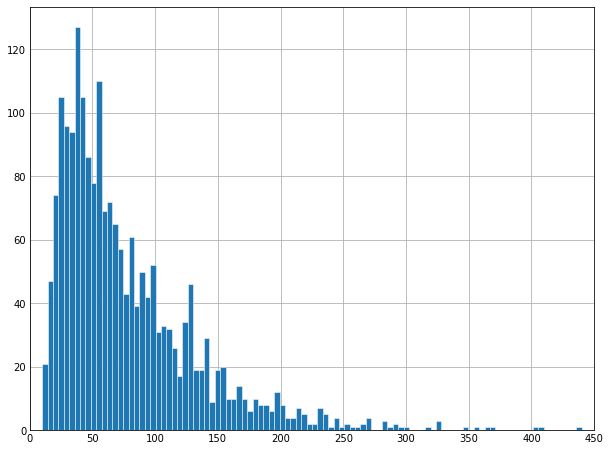

In [264]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()

fig.set_size_inches((8,6))

ax.hist(log, bins=100, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, max(log)+10))

plt.show()

# Expected Position with Regard to Step Number

In [265]:
num_episodes = 2000
max_steps = 500
positions_log = np.empty((num_episodes, max_steps))
positions_log.fill(100)
for i in range(num_episodes):
  state = 0
  done = False
  num_steps = 0
  for j in range(max_steps):
    state, done = step(state)
    positions_log[i][j] = state

In [266]:
timeline_mean = positions_log.mean(axis=0)

In [267]:
timeline_mean

array([ 0.8905,  2.374 ,  4.7925,  7.6185, 10.9115, 14.4495, 18.5525,
       22.67  , 26.6635, 30.768 , 34.6105, 38.247 , 41.1925, 43.9595,
       46.6925, 49.234 , 51.5415, 53.33  , 55.365 , 57.2325, 59.0525,
       60.732 , 62.4795, 63.6115, 64.2815, 65.0655, 66.2575, 66.9105,
       68.3135, 69.108 , 69.6045, 69.9465, 70.1225, 70.5475, 71.252 ,
       71.701 , 72.612 , 72.6805, 73.4925, 74.3045, 75.039 , 75.91  ,
       76.1915, 76.464 , 77.1465, 77.555 , 77.885 , 78.249 , 78.8465,
       79.57  , 79.4455, 79.598 , 79.9175, 80.1625, 80.436 , 80.922 ,
       81.236 , 81.3925, 81.8985, 82.391 , 82.717 , 83.217 , 83.5745,
       83.805 , 83.9245, 84.501 , 84.9885, 85.1445, 85.3805, 85.327 ,
       85.695 , 85.8185, 86.4025, 86.3755, 86.938 , 87.0095, 86.98  ,
       86.8715, 87.56  , 87.313 , 87.939 , 88.314 , 88.596 , 88.642 ,
       88.863 , 89.086 , 89.321 , 89.6205, 89.94  , 90.1675, 89.882 ,
       90.2795, 90.321 , 90.682 , 90.742 , 90.818 , 90.8835, 90.837 ,
       91.12  , 91.1

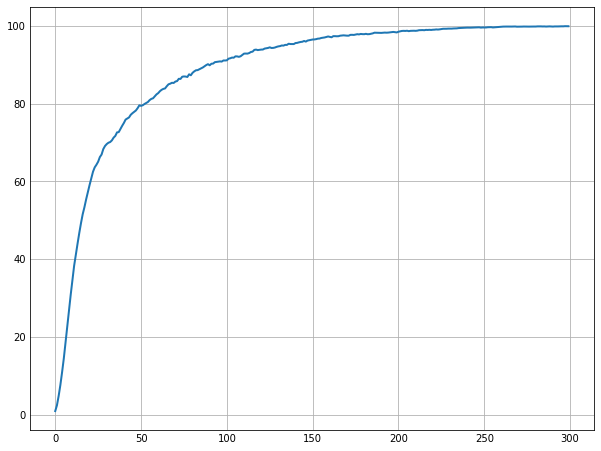

In [268]:
fig, ax = plt.subplots()

ax.plot(timeline_mean[:300], linewidth=2.0)
fig.set_size_inches((8,6))


plt.show()